# $$Relatório~do~ EP2$$

Henrique Suzuki Bilbau <br>
Mateus Carmo Martins de Freitas Barbosa<br>
Eugenio Augusto Jimenes<br>
Luiz Fernando Antonelli Galati<br>
Rodrigo Avila Drummond<br>

### $$Introdução$$


Para este trabalho, foram realizados experimentos de simulação de um Movimento Circular Uniforme, de um Movimento Retilíneo Uniforme em um plano inclinado e de um Movimento Retilíneo Uniformemente Variado em um plano inclinado. Através da utilização de cronômetros e de um acelerômetro, foram adquiridos dados para que fosse possível modelar matematicamente os movimentos realizados. Essa modelagem foi, então, comparada com modelos teóricos de referência, a fim de se aferir o quão próxima da realidade ela estava.

### $$Metodologia$$


Descreveremos aqui, brevemente, como cada um dos experimentos foi realizado.

Para a execução do Movimento Circular Uniforme, deslocamo-nos até a Praça do Relógio Solar, na Cidade Universitária. Ali, fixamos uma das pontas de um barbante de 1 metro em um ponto aleatório do chão. A outra ponta da corda continha um giz que foi utilizado para desenhar, ao redor do ponto fixado, uma circunferência, que foi dividida em quatro segmentos de igual comprimento através da demarcação de pontos com o giz. Então, uma pessoa, ouvindo, através de um fone de ouvido, um metrônomo que emitia sons em intervalos de tempo regulares, passou a andar pela circunferência. Quando o indivíduo passava por cada um dos pontos demarcados, anotava-se o tempo decorrido desde o início do movimento, até que a figura circular fosse percorrida em sua totalidade.

Para o Movimento Retilíneo Uniforme em um plano inclinado, deslocamo-nos até a região da Biblioteca Brasiliana, onde há uma rampa cuja inclinação foi calculada da seguinte maneira: <br>
1 - Demarcamos um percurso retilíneo (uma reta) de 12,8 metros no plano inclinado; <br>
2 - Calculamos a altura a1 do ponto de início do percurso em relação ao solo. O resultado desse cálculo foi a1 =   0,2m; <br>
3 - Calculamos a altura a2 do ponto final do percurso em relação ao solo. O resultado desse cálculo foi a2 = 1,96m;
4 - De posse dessas informações, modelamos o problema através de um triângulo retângulo cujo cateto c1, que      representava a altura, era igual a a2 - a1 = 1,76m e cuja hipotenusa h era igual a 12,8m. Utilizamos Pitágoras para encontrar o valor do outro cateto c2. Esse cálculo nos deu que c2 = 12,68m; <br>
5 - Por fim, calculamos a inclinação i da rampa dividindo c1 por c2. O resultado foi que i = 0,139, o que corresponde a um ângulo de 7,91 graus. <br>
Confirmamos o resultado do nosso cálculo através da utilização de um aplicativo para smartphone chamado "MultiClinometer". <br>
Para prosseguirmos com o experimento, dividimos o percurso demarcado em quatro segmentos de igual comprimento. Então, uma pessoa, ouvindo, através de um fone de ouvido, um metrônomo que emitia sons em intervalos de tempo constantes, passou a andar pela reta. Quando o indivíduo passava por cada um dos pontos demarcados, anotava-se o tempo decorrido desde o início do movimento, até que o percurso fosse percorrido em sua totalidade.

Realizamos o Movimento Retilíneo Uniformemente Variado em plano inclinado também na USP, na Rua do Anfiteatro, altura do número 620. Nesta numeração, essa rua apresenta uma inclinação fixa, que medimos através do aplicativo para Android [Nível de bolha, Prumo, Level](https://play.google.com/store/apps/details?id=org.nixgame.bubblelevel). Como a rua possui uma angulação perpendicular em sua largura, esta medição foi feita no meio, em sua faixa dupla amarela, através da utilização de 4 pontos ao longo 5 metros - totalizando um percurso de 20 metros. As médias de inclinação foram: 4,8; 4,7; 4,7 e 4,7 graus. Demarcamos esses trechos com fita crepe. <br>
Para locomoção uniforme da rua com a gravidade, fizemos o percurso com uma bicicleta cujo motorista começava o percurso no ponto mais alto dos 20 metros e com a roda frontal em cima da marcação com fita (marcação no meio da roda). Sem pôr os pés nos pedais, ou mesmo quaisquer outros impulsos além da gravidade, o ciclista soltava o freio no momento de largada definido por um dos integrantes do grupo, momento no qual iniciaram-se os cronômetros. 
Para medição dos dados com o acelerômetro do Physics Toolbox, o próprio ciclista iniciava um outro cronômetro 5 segundos antes do início do movimento, guardando o celular no bolso antes da largada. 
    

A realização dos experimentos pode ser vista no vídeo: https://www.youtube.com/watch?v=0Zf-rrCp8gA&feature=youtu.be  <br>
Após a realização dos experimentos, os dados foram analisados e colocados em gráficos juntamente com as fórmulas analíticas, a fim de facilitar a comparação dos dados experimentais com os dos modelos teóricos de referência.

### $$Algoritmo~e~dados$$



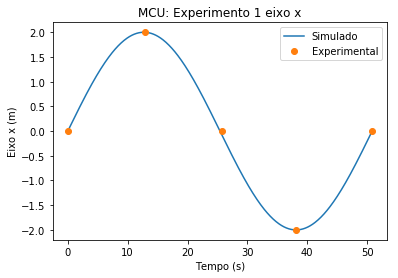

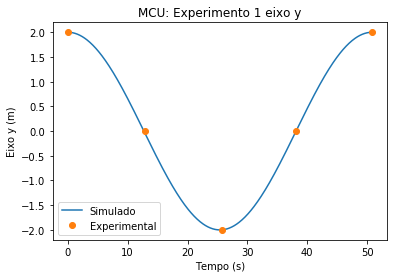

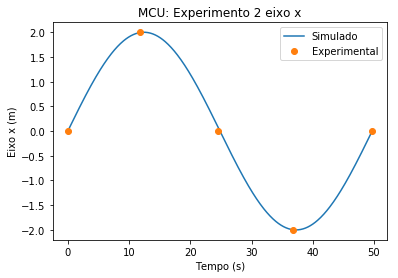

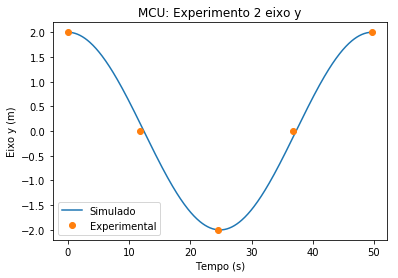

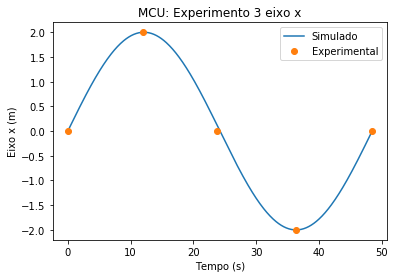

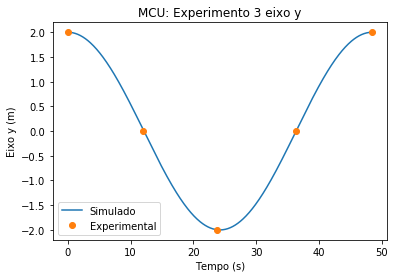

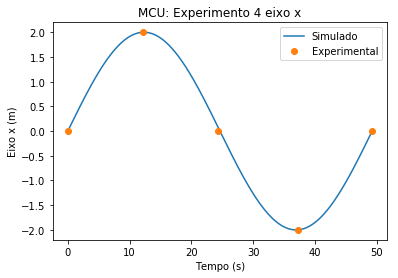

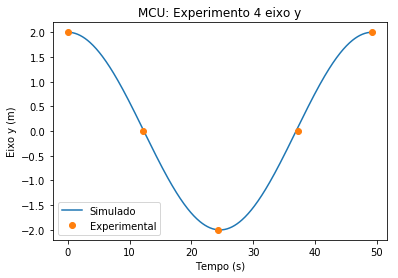

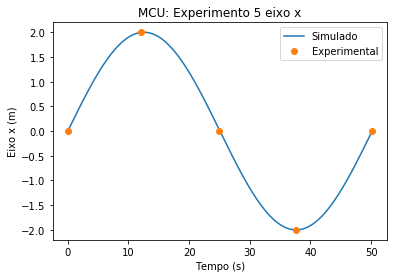

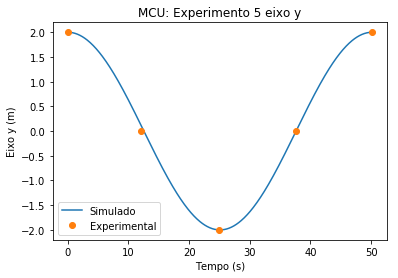

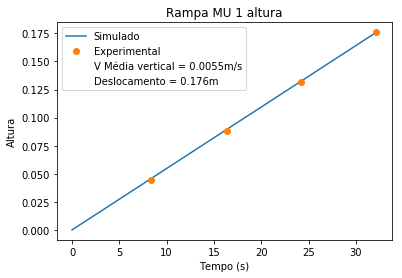

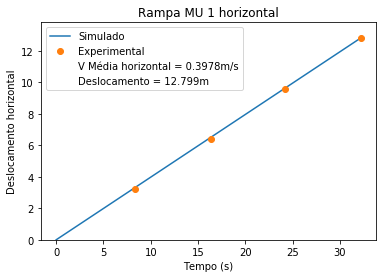

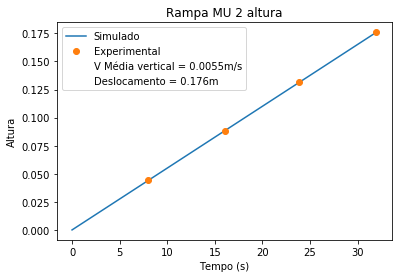

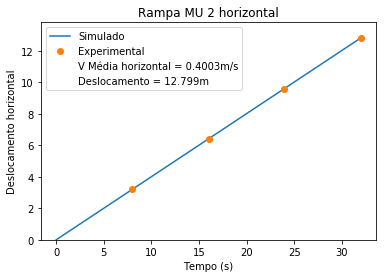

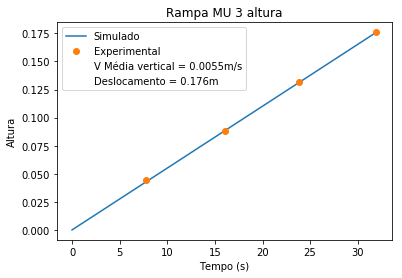

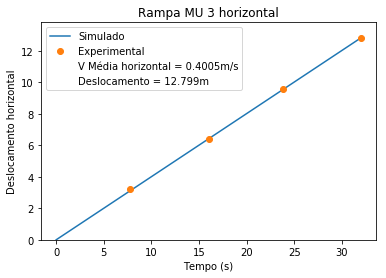

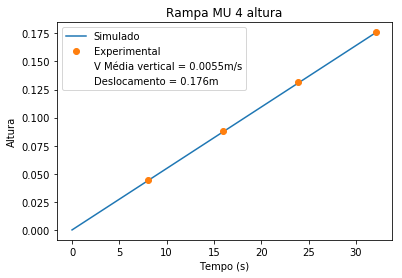

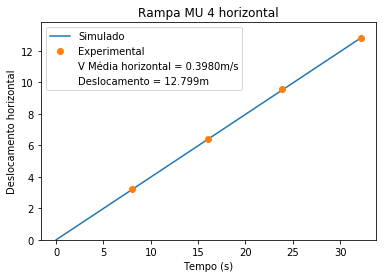

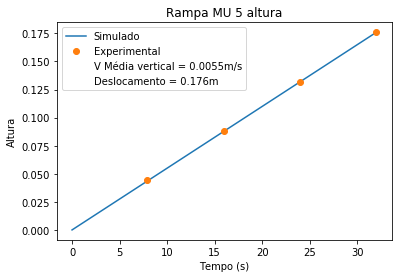

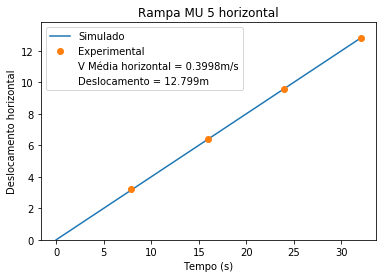

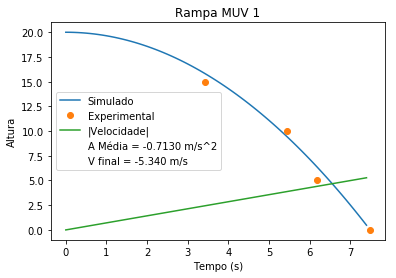

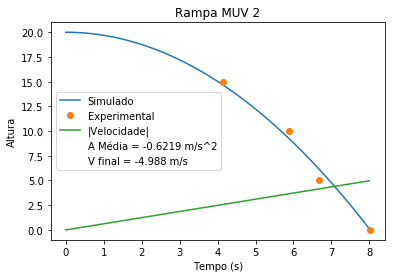

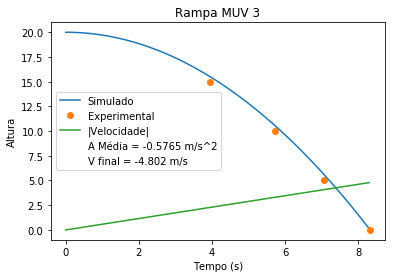

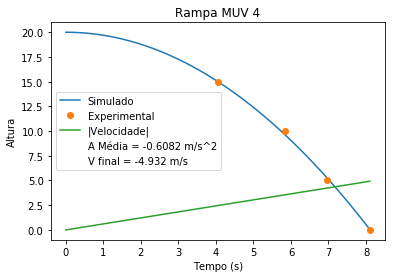

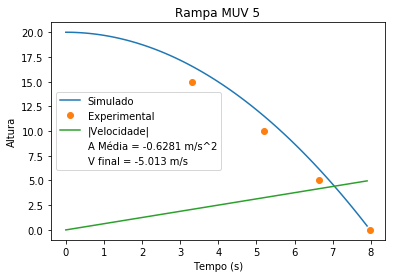

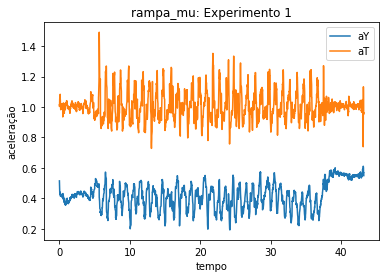

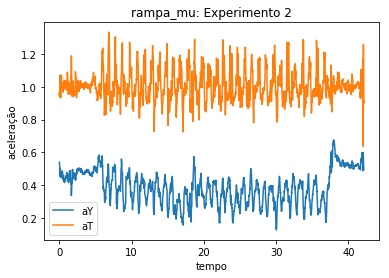

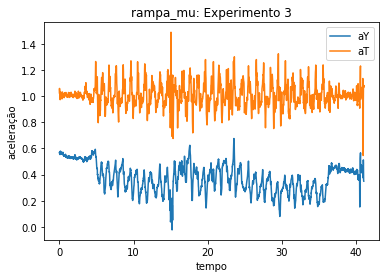

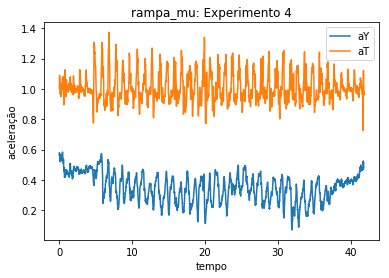

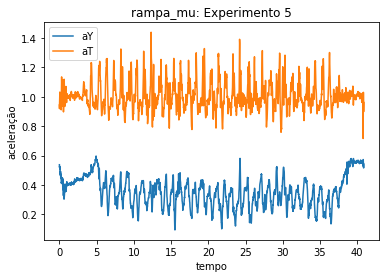

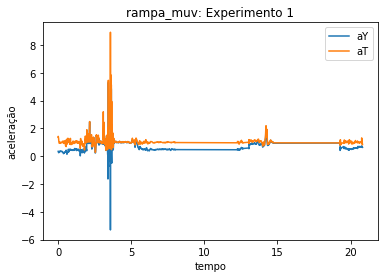

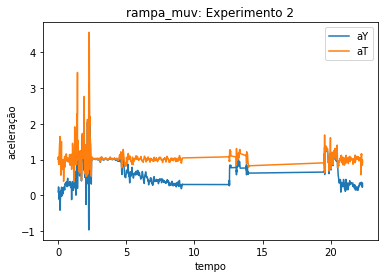

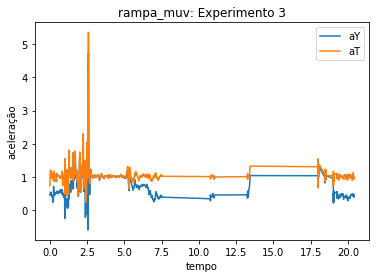

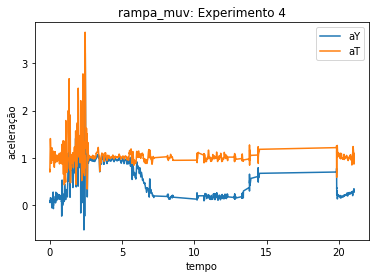

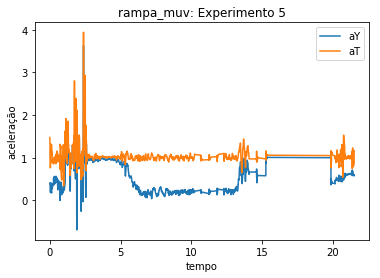

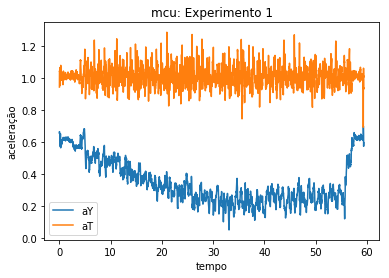

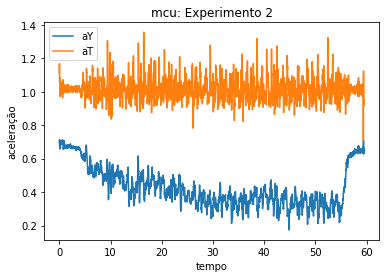

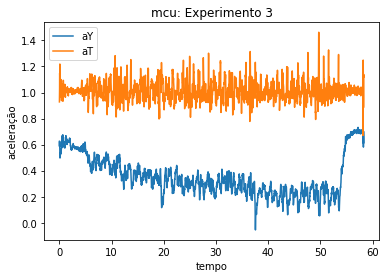

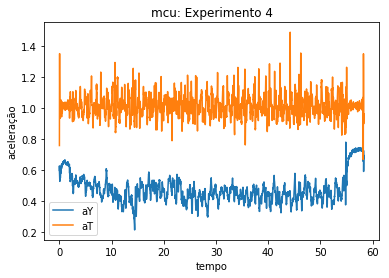

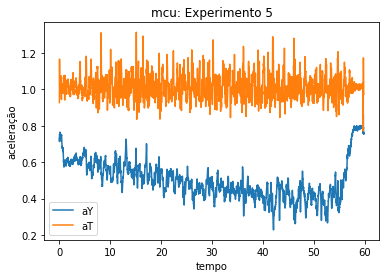

In [15]:
#Às vezes é necessário rodar o programa duas vezes para aparecer os gráficos


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

nomes = ['rampa_mu', 'rampa_muv', 'mcu']

#função que grafica os dados do acelerômetro. É necessário que a pasta com os arquivos csv esteja junto do código
def my_plot(arquivo, titulo, nome_eixo_x, nome_eixo_y):
    dados = np.genfromtxt(arquivo, delimiter=';', skip_header=1, names=['t', 'ax', 'ay','az', 'aT'])
    plt.title(titulo)
    plt.xlabel(nome_eixo_x)
    plt.ylabel(nome_eixo_y)
    plt.plot(dados['t'], dados['ay'], label='aY')
    plt.plot(dados['t'], dados['aT'], label='aT')
    plt.legend()
    plt.show()
    
#função que grafica o MCU    
def mcu(arquivo, titulo):
    dados=np.genfromtxt(arquivo, delimiter=';', dtype=None, skip_header=1, names=['x','y','s'])
    
    plt.title(titulo + ' eixo x')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Eixo x (m)')
    
    #tempo final
    tempof = dados[-1]['s']
    
    t = np.arange(start=0, stop=tempof, step=0.1)
    
    # fórmula analítica do MRU, considerando que espaço inicial e velocidade inicial são iguais a 0
    a,=plt.plot(t, 2 * np.cos(2*np.pi*t/tempof + 3*np.pi/2), label='Simulado')
    b,=plt.plot(dados['s'], dados['x'], linestyle='', marker='o', label='Experimental')
    
    plt.legend(handles=[a,b])
    plt.show()
    
    plt.title(titulo + ' eixo y')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Eixo y (m)')
    
    c,=plt.plot(t, 2 * np.cos(2*np.pi*t/tempof), label='Simulado' )
    d,=plt.plot(dados['s'], dados['y'], linestyle='', marker='o', label='Experimental')

    plt.legend(handles=[c,d])
    plt.show()

    
#função que grafica rampa mu    
def mu_rampa(arquivo, titulo):
    dados=np.genfromtxt(arquivo, delimiter=';', dtype=None, skip_header=1, names=['m', 's'])
    
    #dados recolhidos da rampa
    hip=12.8
    hT=0.176
    hori= (hip**2- hT**2)**(1/2)

    
    #tempo final
    tempof = dados[-1]['s']
    
    t = np.arange(start=0, stop=tempof, step=0.1)
    
    #Rampa altura
    a,=plt.plot(t, (hT/tempof)*t, label='Simulado')
    b,=plt.plot(dados['s'], (dados['m']*hT/hip), linestyle='', marker='o', label='Experimental')
    
   
    patch1 = mpatches.Patch(color='white' ,label='V Média vertical = ' +  format(hT/tempof, '.4f') + 'm/s')
    patch2 = mpatches.Patch(color='white' ,label='Deslocamento = ' +  format(hT, '.3f') + 'm')
    plt.legend(handles=[a,b,patch1,patch2])
    plt.xlabel('Tempo (s)')
    plt.ylabel('Altura')
    plt.title(titulo+' altura')
    plt.show()
    
    #Rampa horizontal
    
    c,=plt.plot(t, (hori/tempof)*t, label='Simulado')
    d,=plt.plot(dados['s'], (dados['m']*hori/hip), linestyle='', marker='o', label='Experimental')
    
   
    patch1 = mpatches.Patch(color='white' ,label='V Média horizontal = ' +  format(hori/tempof, '.4f') + 'm/s')
    patch2 = mpatches.Patch(color='white' ,label='Deslocamento = ' +  format(hori, '.3f') + 'm')
    plt.legend(handles=[c,d,patch1,patch2])
    plt.xlabel('Tempo (s)')
    plt.ylabel('Deslocamento horizontal')
    plt.title(titulo+' horizontal')
    plt.ylim(0,hori+1)
    plt.show()

    
#função que grafica a rampa MUV       
def muv_rampa(arquivo, titulo):
    dados=np.genfromtxt(arquivo, delimiter=';', dtype=None, skip_header=1, names=['m', 's'])
    
    plt.title(titulo)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Altura')
    
    #dados recolhidos da rampa e calculados
    hip=20
    hT=1.882
    hori= 19
    sen=0.094108313318514
    cos=0.99556196460308
    
    #tempo final
    tempof = dados[-1]['s']
    
    t = np.arange(start=0, stop=tempof, step=0.1)
    
    #aceleração na hip 
    ace=(hip*2)/tempof**2
    
    #Rampa 
    a,=plt.plot(t, hip-ace*(t**2)/2, label='Simulado')
    b,=plt.plot(dados['s'], (abs(dados['m']-20)), linestyle='', marker='o', label='Experimental')
    c,=plt.plot(t,ace*t,label='|Velocidade|')
    
   
    patch1 = mpatches.Patch(color='white' ,label='A Média = ' +  format(-1*ace, '.4f') + ' m/s^2')
    patch2 = mpatches.Patch(color='white' ,label='V final = ' +  format(-1*ace *tempof, '.3f') + ' m/s')
    plt.legend(handles=[a,b,c,patch1,patch2])
    plt.title(titulo)
    plt.show()
    
    


for i in range(1,6):
    mcu('tempos/tempo_mcu' + str(i) + '.csv', 'MCU: Experimento ' + str(i))

for i in range(1,6):
    mu_rampa('tempos/tempo_rampa_mu' + str(i) + '.csv', 'Rampa MU ' + str(i))
    
for i in range(1,6):
    muv_rampa('tempos/tempo_rampa_muv'+ str(i) + '.csv', 'Rampa MUV ' + str(i) )    
        
for nome in nomes:
    for i in range(1,6):
        my_plot('Csv/' + nome.lower() + str(i) + '.csv', nome + ': Experimento ' + str(i), 'tempo', 'aceleração')

      

### $$Animações$$

<IPython.core.display.Javascript object>


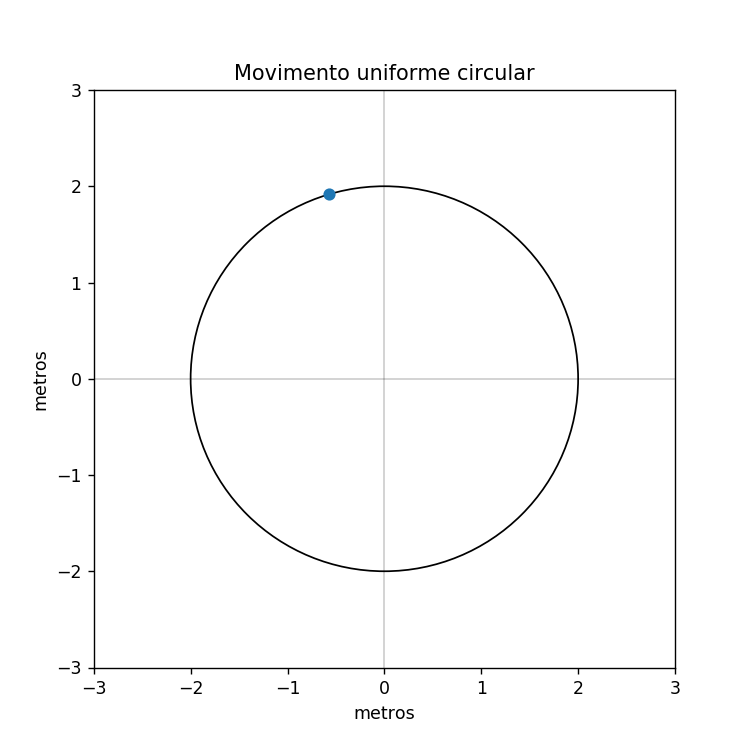

In [16]:
#Execute o código para ver a animação


%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.animation as anima



fig = plt.figure()
ax = plt.axes(xlim=(-3, 3), ylim=(-3, 3))
fig.set_size_inches(6, 6)
plt.title("Movimento uniforme circular")
plt.xlabel("metros")
plt.ylabel("metros")
circle=plt.Circle((0,0),2,fill=False)
gridy=plt.axvline(c='black',linewidth=0.1)
gridx=plt.axhline(c='black',linewidth=0.1)
ax.add_artist(gridx)
ax.add_artist(gridy) 
ax.add_artist(circle)

line, = ax.plot([], [], marker='o')
fps= 3000


def init():
    line.set_data([], [])
    return line,


def animate(i):
    if (i<=fps/2):       
        x = (i -fps/4)/(fps/8)
        y = (4-x*x)**(1/2)
    else:    
        x=(3*fps/4-i)/(fps/8)
        y = -1*(4-x*x)**(1/2)
    line.set_data(x, y)
    return line,

anim = anima.FuncAnimation(fig, animate, init_func=init,
                               frames=fps, interval=1, blit=True)

plt.show()


<IPython.core.display.Javascript object>


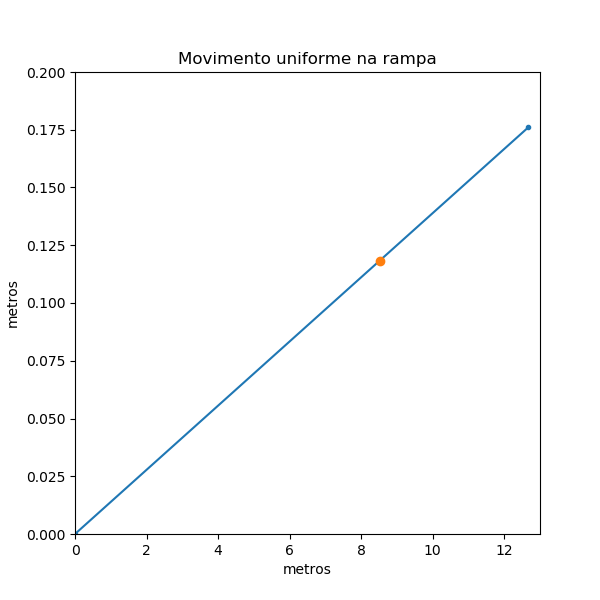

In [1]:
#Execute o código para ver a animação


%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.animation as anima


vert=0.176
hori=12.67
fig = plt.figure()
ax = plt.axes(xlim=(0, 13), ylim=(0,0.2))
fig.set_size_inches(6, 6)
plt.title("Movimento uniforme na rampa")
plt.xlabel("metros")
plt.ylabel("metros")

x1, y1 = [0, hori], [0,vert]
rampa,=plt.plot(x1,y1,linestyle='-', marker='.')


line, = ax.plot([], [], marker='o')
fps= 1000


def init():
    line.set_data([], [])
    return line,


def animate(i):       
    x = i*hori/fps
    y = i*vert/fps
    line.set_data(x, y)
    return line,


anim = anima.FuncAnimation(fig, animate, init_func=init,
                               frames=fps, interval=1.5, blit=True)

plt.show()

<IPython.core.display.Javascript object>


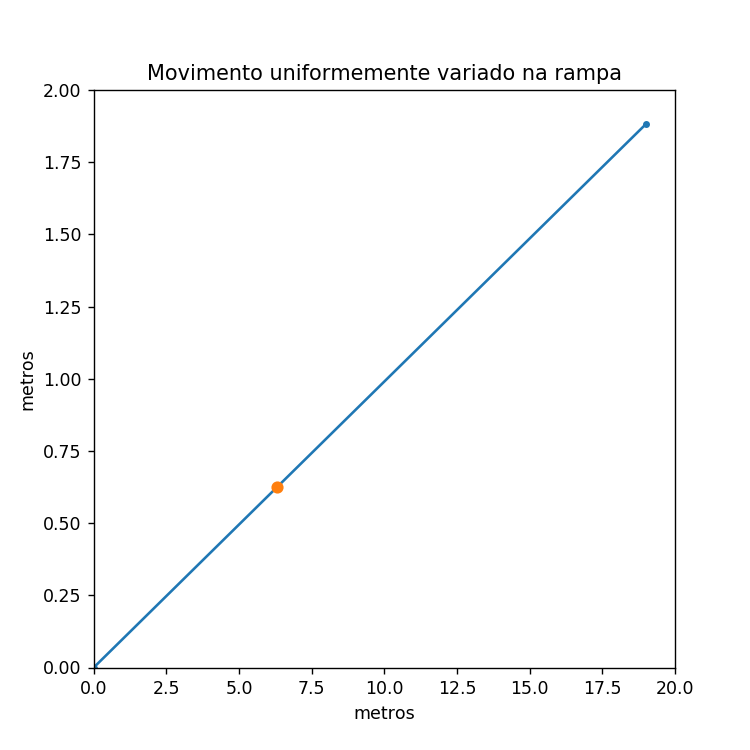

In [18]:
#Execute o código para ver a animação


%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.animation as anima


#dados recolhidos da rampa e calculados
hip=20
vert=1.882
hori= 19
sen=0.094108313318514
cos=0.99556196460308

fig = plt.figure()
ax = plt.axes(xlim=(0,20), ylim=(0,2))
fig.set_size_inches(6, 6)
plt.title("Movimento uniformemente variado na rampa")
plt.xlabel("metros")
plt.ylabel("metros")

fps= 2000
acex=-1*(hori*2)/(fps**2)
acey=-1*(vert*2)/(fps**2)

x1, y1 = [hori, 0], [vert,0]
rampa,=plt.plot(x1,y1,linestyle='-', marker='.')


line, = ax.plot([], [], marker='o')



def init():
    line.set_data([], [])
    return line,


def animate(i):       
    x = hori + (acex/2)*(i**2)
    y = vert + (acey/2)*(i**2)
    line.set_data(x, y)
    
  
    
    return line,


anim = anima.FuncAnimation(fig, animate, init_func=init,
                               frames=fps, interval=1.5, blit=True)

plt.show()

### $$Análise~e~interpretação$$

Vê-se que os dados simulados do Movimento Circular Uniforme e do Movimento Uniforme em rampa condizem, com alto grau de precisão, com os dados experimentais obtidos, o que atesta a eficácia da realização desses experimentos.
O Movimento Uniformemente Variado em rampa apresenta, relativamente, a maior discrepância entre os dados simulados e os experimentais, mas tal diferença é suficientemente pequena para que seja considerada uma leve imprecisão ou no modelo, ou no método de aquisição de dados.

### $$Crítica$$

A diferença entre o modelo simulado e os dados experimentais no Movimento Uniformemente Variado deve-se provavelmente à alta velocidade adquirida ao longo do movimento, o que faz com que o tempo de reação dos encarregados de marcar o tempo no cronômetro possa interferir em maior escala na aferição dos dados. Ademais, o modelo utilizado não leva em consideração o atrito entre o asfalto e os pneus da bicicleta.
Outro problema que o grupo encontrou foi que na animação do movimento circular uniforme, devido às taxas de frames estarem associadas ao eixo x, tem-se uma aceleração quando a função se aproxima de 0. Isso ocorre devido ao fato de a derivada tender ao infinito nesses pontos.
Além disso, como o ciclista guardava o celular no bolso, existe um ruído que pode ser visto nos gráficos dos acelerômetros nos 5 segundos iniciais (antes do movimento) e nos 5 segundos finais (após a parada).

### $$Log$$

- Realização do experimento: 6 horas <br>
- Edição do vídeo: 3 horas <br>
- Criação do algoritmo e processamento de dados: 8 horas  <br>
- Criação do Relatório: 3 horas

### $$Contribuição$$

- Henrique Suzuki Bilbau: Cronômetro, algoritmo e animações. 
- Mateus C. M. de F. Barbosa: Travessia, cronômetro, algoritmo e relatório. 
- Eugenio Augusto Jimenes: Travessia e relatório. 
- Luiz Fernando Galati: Registro dos dados, relatório, filmagem e edição do vídeo. 
- Rodrigo Avila Drummond: Cronômetro.